In [19]:
from logprocessor import devs_output_to_list_of_dict
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt


raw_data = devs_output_to_list_of_dict('teacuplogs/teacup.out')
data = pd.DataFrame.from_records(raw_data,
                                 index=['time_in_seconds'],
                                 columns=['time_in_seconds', 'port', 'value'],
                                 coerce_float=True)
data = data[pd.notnull(data.index)]
data['value'] = pd.to_numeric(data['value']) 
print(data.dtypes)
print(data.head())


port      object
value    float64
dtype: object
                                            port    value
time_in_seconds                                          
0.000            out_teacuptemperatureintegrator  180.000
0.163            out_teacuptemperatureintegrator  178.200
0.328            out_teacuptemperatureintegrator  176.418
0.494            out_teacuptemperatureintegrator  174.654
0.660            out_teacuptemperatureintegrator  172.907


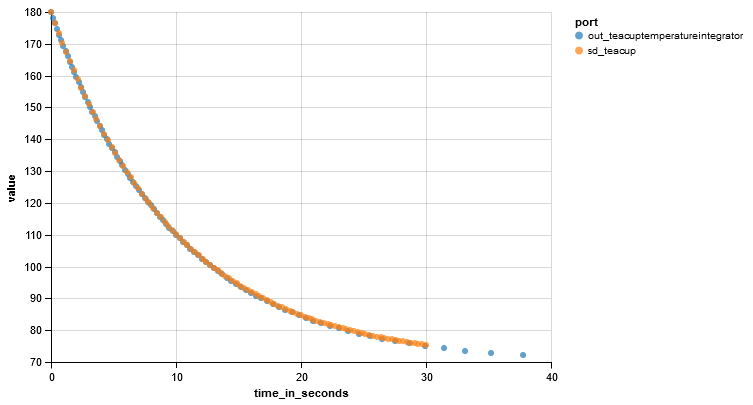

In [51]:
from altair import *

sd_data = pd.read_csv('sd_teacup.csv')
sd_data['port'] = 'sd_teacup'

both_data = data.reset_index().append(sd_data)
both_data = both_data.loc[both_data['time_in_seconds'] < 40]

Chart(both_data).mark_circle().encode(
    x='time_in_seconds:Q',
    y=Y('value:Q',scale=Scale(domain=(70, 180), clamp=True)),
    color='port:N'
)